# Cheminformatics in Python: Predicting Solubility of Molecules | End-to-End Data Science Project
##  By OTTAH DANIEL CHUKWUEMEKA

## CHEMISTRY STUDENT, DEPARTMENT OF CHEMISTRY (MICHAEL OKPARA UNIVERSITY OF AGRICULTURE UMUDIKE)

## This jupyter notebook is about Cheminformatics which lies at the interface of Informatics and Chemistry. We will be reproducing a research article (by John S. Delaney1) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

## This idea for this notebook was inspired by the excellent blog post by Pat Walters2 where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More. 3

# 1 Installing rdkit

In [1]:
!pip install rdkit-pypi


# 2. Delaney's solubility dataset
### The original Delaney's dataset available as a Supplementary file 4 The full paper is entitled ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure. 1

## 2.1 Download the dataset 
### ! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

## 2.2 Read in the dataset

In [2]:
!pip install pandas


In [14]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)


In [2]:
df = pd.read_csv(r"C:\Users\daniel\Desktop\Files\Skills\Python for Data Science\Datasets\Predicting_molecule_solubility.csv")
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
5,"1,1-Dichloroethane",-1.290,-1.576,CC(Cl)Cl
6,"1,1-Dichloroethylene",-1.640,-1.939,ClC(=C)Cl
7,"1,1-Diethoxyethane",-0.430,-0.899,CCOC(C)OCC
8,"1,2,3,4-Tetrachlorobenzene",-4.570,-4.546,Clc1ccc(Cl)c(Cl)c1Cl
9,"1,2,3,4-Tetrahydronapthalene",-4.370,-3.447,C1CCc2ccccc2C1


In [6]:
df.shape #to display total number of rows and columns

(1144, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Compound ID                           1144 non-null   object 
 1   measured log(solubility:mol/L)        1144 non-null   float64
 2   ESOL predicted log(solubility:mol/L)  1144 non-null   float64
 3   SMILES                                1144 non-null   object 
dtypes: float64(2), object(2)
memory usage: 35.9+ KB


In [10]:
df.describe()

,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L)
count,1144.000000,1144.000000
mean,-3.057997,-2.994776
std,2.096502,1.686520
min,-11.600000,-9.702000
25%,-4.332250,-3.962250
50%,-2.870500,-2.889000
75%,-1.600000,-1.846750
max,1.580000,1.091000


## 2.3 Examining the SMILES data
### Chemical structures are encoded by a string of text known as SMILES which is an acronym for Simplified Molecular-Input Line-Entry System.

In [17]:
smiles_col = df.SMILES
print(smiles_col)

#smiles_col=df["SMILES","Compound ID"]
#smiles_col


0                                          ClCC(Cl)(Cl)Cl
1                                            CC(Cl)(Cl)Cl
2                                          ClC(Cl)C(Cl)Cl
3                                              ClCC(Cl)Cl
4                                     FC(F)(Cl)C(F)(Cl)Cl
5                                                CC(Cl)Cl
6                                               ClC(=C)Cl
7                                              CCOC(C)OCC
8                                    Clc1ccc(Cl)c(Cl)c1Cl
9                                          C1CCc2ccccc2C1
10                                 Clc1cc(Cl)c(Cl)c(Cl)c1
11                                       Clc1cccc(Cl)c1Cl
12                                          Cc1cccc(C)c1C
13                                   Brc1cc(Br)c(Br)cc1Br
14                                   Clc1cc(Cl)c(Cl)cc1Cl
15                                       Cc1cc(C)c(C)cc1C
16                                   c1(Br)c(Br)cc(Br)cc1
17            

### viewing The first element from the SMILES column of the  dataframe.



In [18]:
df.SMILES[0]

'ClCC(Cl)(Cl)Cl'

### 2.4.  Convert a molecule from the SMILES string to an rdkit object

In [4]:
from rdkit import Chem

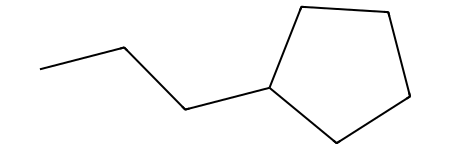

In [7]:
m=df.SMILES[1000]
Chem.MolFromSmiles(m)

### 2.5. Working with rdkit object

In [27]:
m = Chem.MolFromSmiles('Brc1cc(Br)c(Br)cc1Br')
m.GetNumAtoms()                          # to get the number of atoms

10

#    3. Calculate molecular descriptors in rdkit
# 
###  3.1. Convert list of molecules to rdkit object


### 3.1.1. Method 1

In [20]:
mol_list= []
for element in df.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [21]:
len(mol_list)         # to ensure that it correspond to the total number of rows

1144

In [22]:
mol_list[:]             # to show the first 10 molecules

 ...]

## 3.1.2. Method 2

In [32]:
mol_list2 = [Chem.MolFromSmiles(element) for element in df.SMILES]

In [33]:
len(mol_list2)

1144

In [35]:
mol_list2[:10]

### 3.2. Calculate molecular descriptors


To predict LogS (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:

1. cLogP (Octanol-water partition coefficient)
2. MW (Molecular weight)
3. RB (Number of rotatable bonds)
4. AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)
Unfortunately, rdkit readily computes the first 3. As for the AP descriptor, we will calculate this by manually computing the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute.

### 3.2.1. LogP, MW and RB 

In [23]:
import numpy as np
from rdkit.Chem import Descriptors

In [24]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [40]:
df_2 = generate(df.SMILES)
df_2 

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
5,1.81000,98.960,0.0
6,1.93520,96.944,0.0
7,1.40540,118.176,4.0
8,4.30020,215.894,0.0
9,2.56540,132.206,0.0


### 3.2.2. Aromatic proportion

## 3.2.1.1. Number of aromatic atoms
Here, we will create a custom function to calculate the Number of aromatic atoms. With this descriptor we can use it to subsequently calculate the AP descriptor.

Computing for a single molecule.

In [43]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

In [44]:
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [33]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [34]:
AromaticAtoms(m)

6

### Computing for molecules in the entire dataset

In [49]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

### 3.2.1.2. Number of heavy atoms
#### Here, we will use an existing function for calculating the Number of heavy atoms.

#### Computing for a single molecule.

In [50]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
Descriptors.HeavyAtomCount(m)

34

#### Computing for molecules in the entire dataset.

In [51]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

#### 3.2.1.3. Computing the Aromatic Proportion (AP) descriptor
Computing for a single molecule.

In [52]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

### Computing for molecules in the entire dataset.

In [53]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [54]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.600000
9,0.600000


### 3.3. X matrix (Combining all computed descriptors into 1 dataframe)

In [55]:
df_2

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
5,1.81000,98.960,0.0
6,1.93520,96.944,0.0
7,1.40540,118.176,4.0
8,4.30020,215.894,0.0
9,2.56540,132.206,0.0


In [56]:
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.600000
9,0.600000


### Let's combine the 2 dataframes to produce the X matrix

In [59]:
X = pd.concat([df_2,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
5,1.81000,98.960,0.0,0.000000
6,1.93520,96.944,0.0,0.000000
7,1.40540,118.176,4.0,0.000000
8,4.30020,215.894,0.0,0.600000
9,2.56540,132.206,0.0,0.600000


## 3.4. Y matrix


In [61]:
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
5,"1,1-Dichloroethane",-1.290,-1.576,CC(Cl)Cl
6,"1,1-Dichloroethylene",-1.640,-1.939,ClC(=C)Cl
7,"1,1-Diethoxyethane",-0.430,-0.899,CCOC(C)OCC
8,"1,2,3,4-Tetrachlorobenzene",-4.570,-4.546,Clc1ccc(Cl)c(Cl)c1Cl
9,"1,2,3,4-Tetrahydronapthalene",-4.370,-3.447,C1CCc2ccccc2C1


### Assigning the second column (index 1) to the Y matrix

In [63]:
Y = df.iloc[:,1]
Y

0       -2.180
1       -2.000
2       -1.740
3       -1.480
4       -3.040
5       -1.290
6       -1.640
7       -0.430
8       -4.570
9       -4.370
10      -4.630
11      -4.000
12      -3.200
13      -6.980
14      -5.560
15      -4.590
16      -4.500
17      -3.590
18      -3.310
19       0.620
20      -3.500
21      -1.680
22      -3.050
23      -1.060
24      -1.600
25      -2.740
26      -0.770
27      -3.280
28      -3.100
29      -0.590
30      -5.600
31      -4.480
32      -3.400
33      -2.890
34       0.810
35      -1.870
36      -3.540
37      -3.040
38      -1.620
39      -1.460
40      -2.000
41      -4.290
42      -2.290
43      -0.170
44      -2.060
45      -4.070
46      -3.270
47      -3.750
48      -1.970
49      -4.140
50      -3.390
51      -2.090
52      -4.679
53      -2.680
54      -2.680
55      -1.740
56      -3.999
57      -4.220
58      -2.430
59      -2.370
60      -4.430
61      -3.810
62      -4.350
63      -5.060
64      -3.080
65      -1.730
66       0

## Data split

In [66]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/04/b8/947f40706ee2e316fd1a191688f690c4c2b351c2d043fe9deb9b7940e36e/scipy-1.11.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.1 kB 217.9 kB/s eta 0:00:01
     -------------------------- ----------- 41.0/59.1 kB 163.4 kB/s eta 0:00:01
     -------------------------------- --

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Linear Regression Model

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Predicts the X_train

In [72]:
Y_pred_train = model.predict(X_train)

In [73]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.75371499 -0.00657941  0.01080011 -0.37222045]
Intercept: 0.255334899432051
Mean squared error (MSE): 1.02
Coefficient of determination (R^2): 0.77


## Predicts the X_test

In [74]:
Y_pred_test = model.predict(X_test)

In [75]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.75371499 -0.00657941  0.01080011 -0.37222045]
Intercept: 0.255334899432051
Mean squared error (MSE): 0.99
Coefficient of determination (R^2): 0.78


## Linear Regression Equation¶

The work of Delaney$^1$ provided the following linear regression equation:

> LogS = 0.16 -  0.63 cLogP - 0.0062 MW + 0.066 RB - 0.74 AP

The reproduction by Pat Walters$^2$ provided the following:

> LogS = 0.26 -  0.74 LogP - 0.0066 MW + 0.0034 RB - 0.42 AP

This notebook's reproduction gave the following equation:

* Based on the Train set
> LogS = 0.30 -0.75 LogP - .0066 MW -0.0041 RB - 0.36 AP

* Based on the Full dataset
> LogS =  0.26 -0.74 LogP - 0.0066 + MW 0.0032 RB - 0.42 AP

## Our linear regression equation

In [76]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 0.26 -0.75 LogP -0.0066 MW 0.0108 RB -0.37 AP


The same equation can also be produced with the following code (which breaks up the previous one-line code into several comprehensible lines.

In [78]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [79]:
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' ' + 
      RB + 
      ' ' + 
      AP)

LogS =  0.26 -0.75 LogP -0.0066 MW 0.0108 RB -0.37 AP


### Use entire dataset for model training (For Comparison)

In [80]:
full = linear_model.LinearRegression()
full.fit(X, Y)

LinearRegression()

In [81]:
full_pred = model.predict(X)

In [82]:
print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997181
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [83]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '+ %.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]


In [84]:
print('LogS = ' + 
      ' ' + 
      full_yintercept + 
      ' ' + 
      full_LogP + 
      ' ' + 
      full_MW + 
      ' ' + 
      full_RB + 
      ' ' + 
      full_AP)

LogS =  0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


## Scatter plot of experimental vs. predicted LogS¶

In [92]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/52/65/aaa3d2b7a292d93cc2cf1c534d03ba3f744e480f15b3b2ab6ad68189f7ee/fonttools-4.42.0-cp311-cp311-win_amd64.whl.metadata
  Using cached fonttools-4.42.0-cp311-cp311-win_amd64.whl.metadata (153 kB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB

In [93]:
import matplotlib.pyplot as plt

### Quick check of the variable dimensions of Train and Test sets

In [94]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [95]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

### Vertical plot

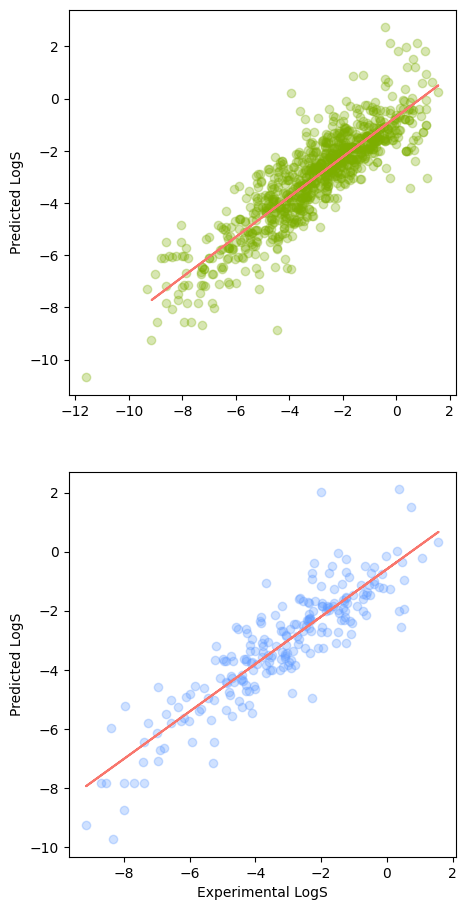

In [96]:
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

### Horizontal plot

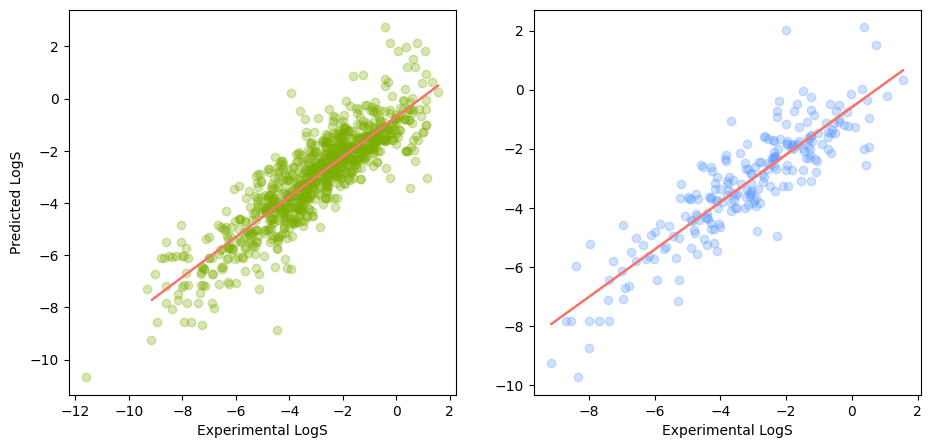

In [97]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()

In [98]:
!

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Reference
1. John S. Delaney. ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure. J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000-1005.

2. Pat Walters. Predicting Aqueous Solubility - It's Harder Than It Looks. Practical Cheminformatics Blog

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More, O'Reilly, 2019.

4. Supplementary file from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.